<a href="https://colab.research.google.com/github/Rahman88talha/Capstone-Customer_Segmentation_Clustering/blob/main/Capstone_Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [30]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Project Unsupervised-Clustering/Online Retail.xlsx') # reading our data

In [33]:
df.head() # looking into data set & their shape

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [34]:
df.shape

(541909, 8)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [36]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Checking Null Values in dataset

In [37]:
# Total null values in each of the columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Here, we have Null data in two columns: Description & Customer Id

We will remove these null values one by one

In [38]:
# Dropping the null values from description & Customer ID column
df.dropna(subset = ['Description'], inplace = True)
df.dropna(subset=['CustomerID'], axis = 0, inplace = True)

In [39]:
#checking null value
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

hence Null Values has been dropped

In [40]:
# Checking the totol number of duplicate values 
print('Duplicate values:',len(df[df.duplicated()]))

# Dropping the duplicate values from the dataset
df.drop_duplicates(inplace = True)

Duplicate values: 5225


In [41]:
df1 = df.copy() # copy of original dataset
df1.shape

(401604, 8)

After dropping null and duplicate values we see that 401604 rows and 8 columns are there in this dataset.

In [42]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Droping all the cancelled record

In [43]:
# Converting the column to a string type to detect 'C'
df1['InvoiceNo'] = df1['InvoiceNo'].astype('str')
df1=df1[~df1['InvoiceNo'].str.contains('C')]

we have drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation

In [44]:
# Converting the Invoice no column back to a numerical type
df1['InvoiceNo'] = df1['InvoiceNo'].apply(int)

In [45]:
print("Number of transactions: ", df['InvoiceNo'].nunique())          # Total unique transactions 
print("Number of products bought: ", df['StockCode'].nunique())       # Total no. of unique products bought 
print("Number of customers:", df['CustomerID'].nunique())             # Total no. of unique customers 
print('Number of countries: ', df['Country'].nunique())               # Total no. of unique countries  

Number of transactions:  22190
Number of products bought:  3684
Number of customers: 4372
Number of countries:  37


## Exploratory Data Analysis (EDA)

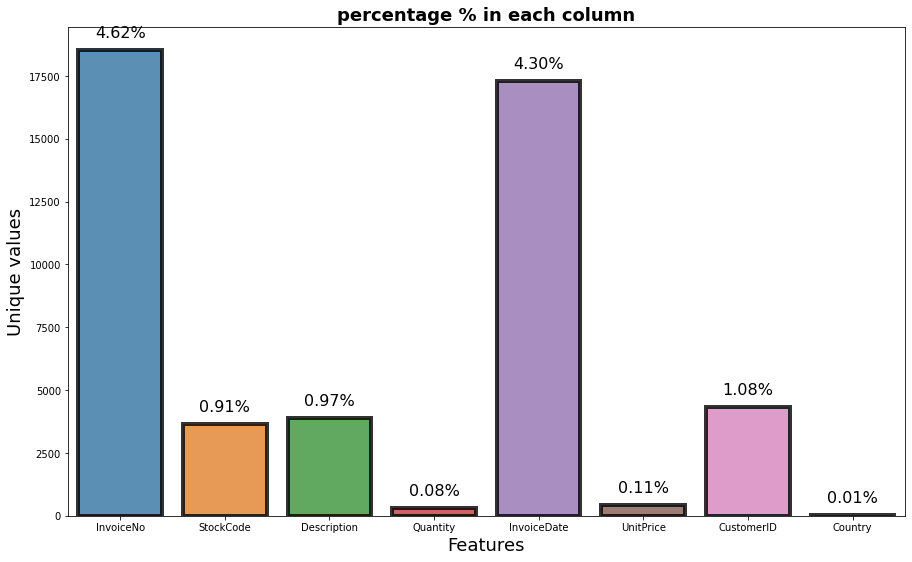

In [46]:
unique_featues_df = pd.DataFrame()
unique_featues_df['Features']=df1.columns
unique=[]
for i in df1.columns:
  unique.append(df1[i].nunique())
unique_featues_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,9))

splot = sns.barplot(x=unique_featues_df['Features'], y=unique_featues_df['Uniques'], alpha=0.8, edgecolor = 'black', lw = 4)
for p in splot.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", SIZE = 16)
    
plt.title('percentage % in each column', weight='bold', size=18)
plt.ylabel('Unique values', size=18)
plt.xlabel('Features', size=18)
plt.show()

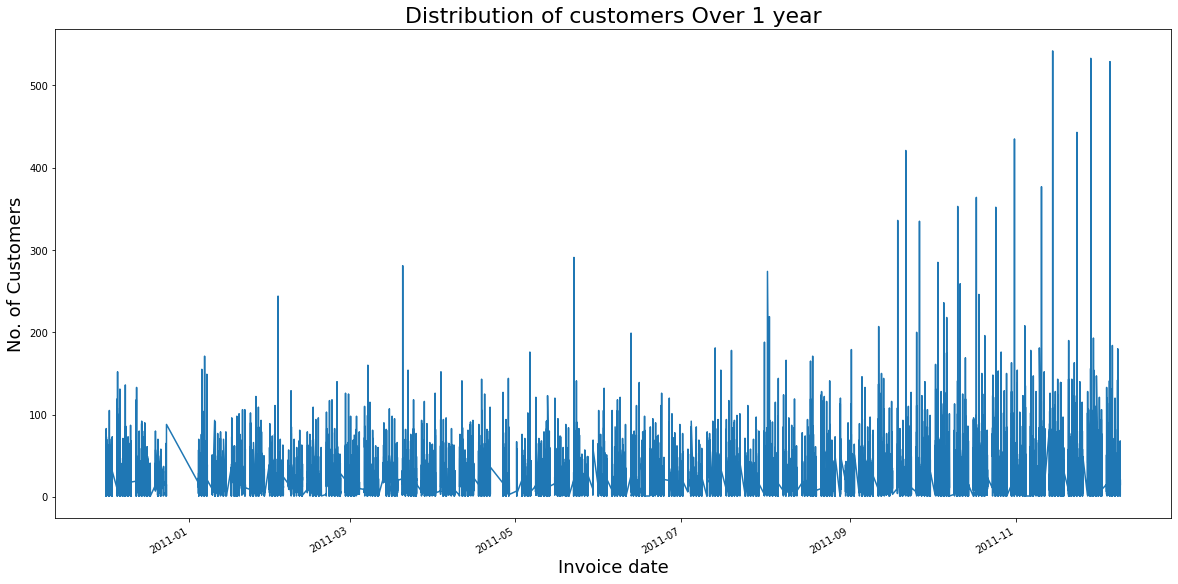

In [47]:
# customer distribution in 1 year time period
plt.figure(figsize=(20,10))
customer_distribution = df1.groupby('InvoiceDate').count()['CustomerID'].plot()
plt.title('Distribution of customers Over 1 year', size=22)
plt.xlabel('Invoice date', size=18)
plt.ylabel('No. of Customers', size=18)
plt.show()

Let's explore Country on the basis of maximum order

In [48]:
# Top 10 countries who's buying maximum products
Top_10_country = df1['Country'].value_counts().reset_index()
Top_10_country['Country %']= Top_10_country['Country']*100/df1['Country'].count()     # Adding country percentage column to top 10 countries data frame
Top_10_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_10_country[:10]

,Country_Name,Count,Country %
0,United Kingdom,349227,88.922471
1,Germany,9027,2.298514
2,France,8327,2.120275
3,EIRE,7228,1.840441
4,Spain,2480,0.631474
5,Netherlands,2363,0.601683
6,Belgium,2031,0.517147
7,Switzerland,1842,0.469022
8,Portugal,1453,0.369972
9,Australia,1184,0.301478


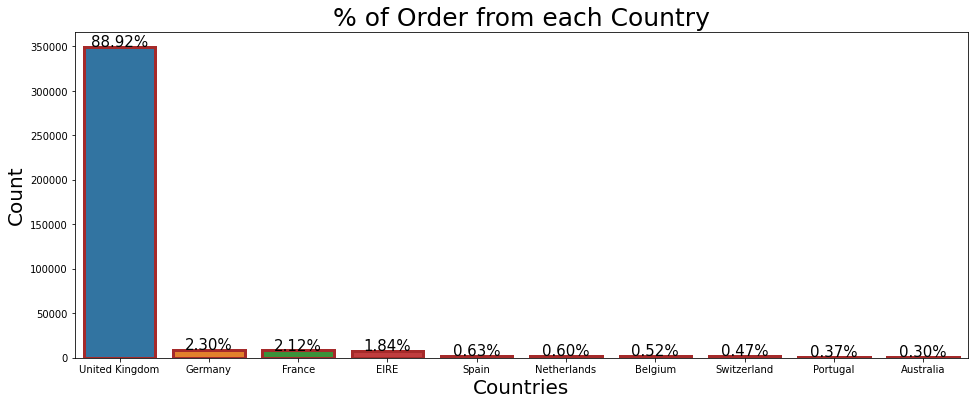

In [49]:
fig, ax = plt.subplots(figsize = (16,6))
splot = sns.barplot(x='Country_Name',y='Count',data=Top_10_country[:10], edgecolor = 'brown', lw = 3)
plt.title('% of Order from each Country', SIZE = 25)
plt.xlabel('Countries', SIZE = 20)
plt.ylabel('Count', SIZE = 20)
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df1.shape[0]*100),ha = "center", SIZE = 15)

Maximum orders are recieved from United Kingdom

In [50]:
# Creating amount column by multiply quantity with unitprice
df['Amount'] = df.Quantity*df.UnitPrice

# Checking which CustomerID spend maximum amount.
PercentSales = df.groupby(["CustomerID"]).Amount.sum().sort_values(ascending = False).iloc[:10].reset_index()
PercentSales

,CustomerID,Amount
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187322.17
3,14911.0,132458.73
4,12415.0,123725.45
5,14156.0,113214.59
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62690.54
9,15311.0,59284.19


Text(0.5, 1.0, 'Big order CustomerID')

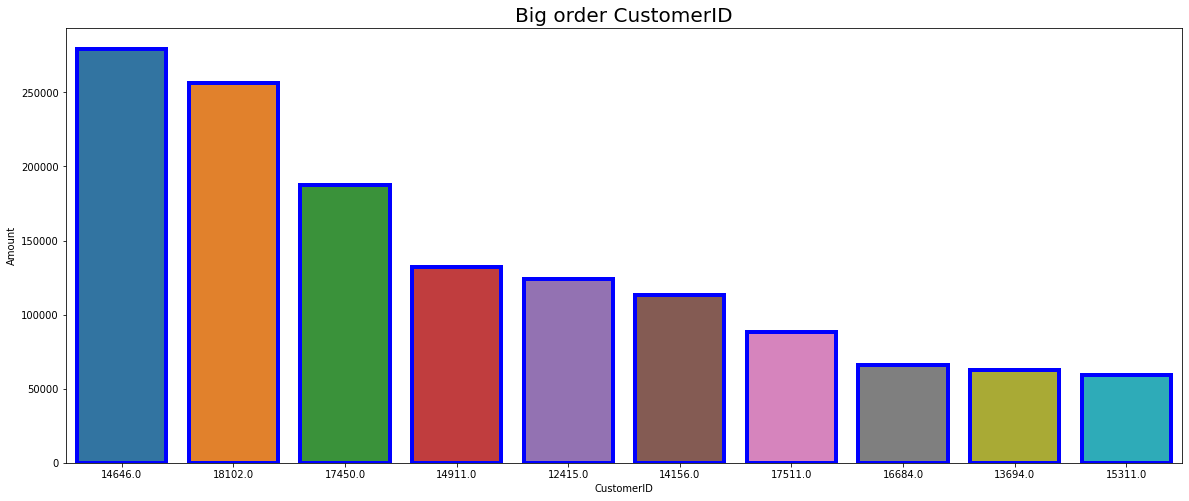

In [51]:
plt.figure(figsize=(20,8))
sns.barplot(x="CustomerID", y="Amount", data = PercentSales, order = PercentSales['CustomerID'], edgecolor = 'blue', lw = 4)
plt.title('Big order CustomerID', size = 20)

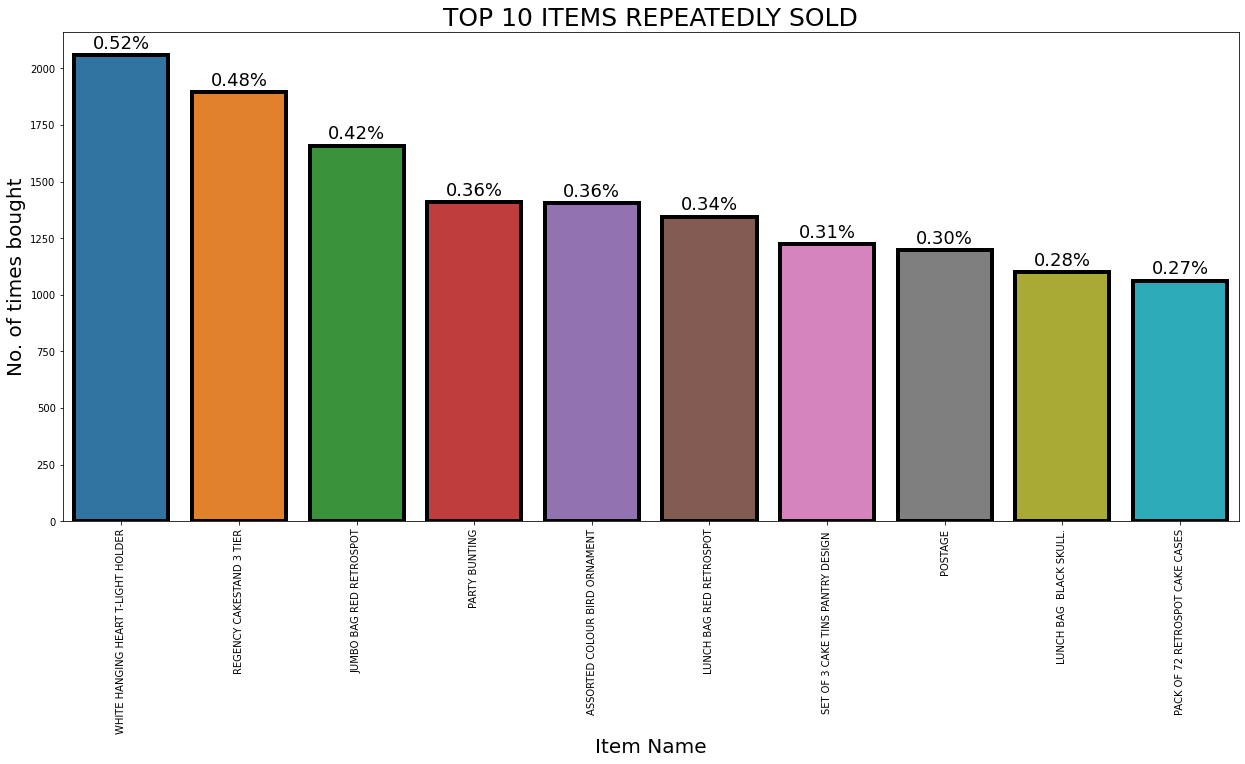

In [52]:
product_df = df['Description'].value_counts().reset_index()
product_df.rename(columns={'index': 'Description_Name','Description': 'Count'}, inplace=True)

# Barplot of the top 10 most repeatedly sold items
fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x='Description_Name',y='Count',data = product_df[:10], edgecolor = 'black',lw =4)
plt.xlabel('Item Name', SIZE = 20)
plt.ylabel('No. of times bought', SIZE = 20)
plt.title('TOP 10 ITEMS REPEATEDLY SOLD', SIZE = 25)
plt.tight_layout()
plt.xticks(rotation = 90)   # by using xticks we rotate our column labels to 90 degree.
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+30, '{:1.2f}''%'.format(height/df1.shape[0]*100),ha = "center", SIZE = 18)

WHITE HANGING HEART T-LIGHT HOLDER is among the top product which were reretedly sold

Now, Checking the distribution of numerical column to understand the data distribution is whether positively skewed, negative skewed or symetric.

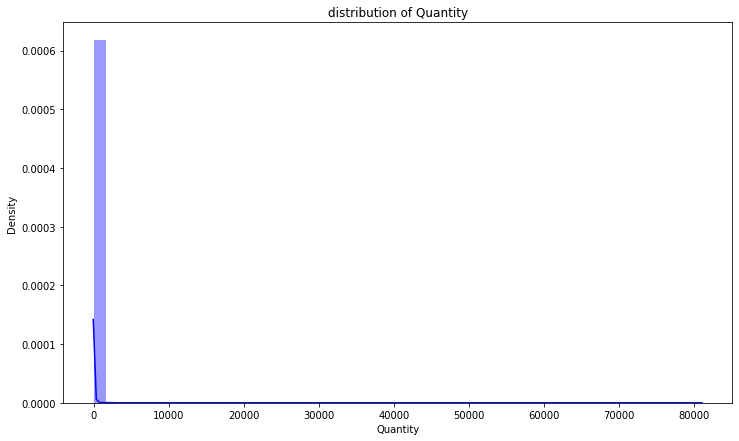

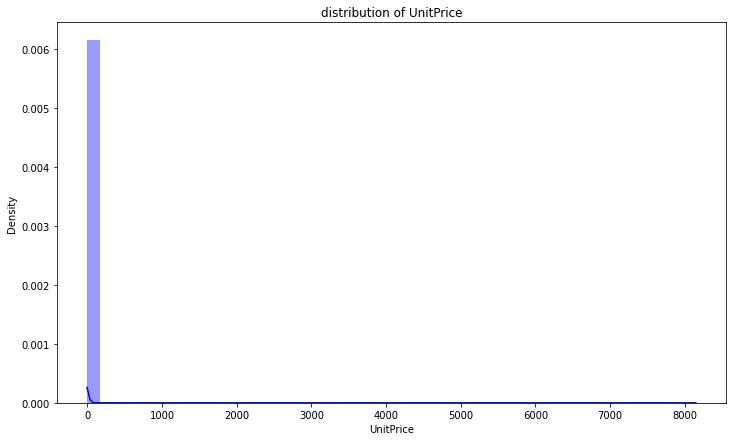

In [53]:
#distribution of Quantity
plt.figure(figsize=(12,7))
plt.title('distribution of Quantity')
sns.distplot(df1['Quantity'],color="Blue")

#distribution of UnitPrice
plt.figure(figsize=(12,7))
plt.title('distribution of UnitPrice')
sns.distplot(df1['UnitPrice'],color="Blue")

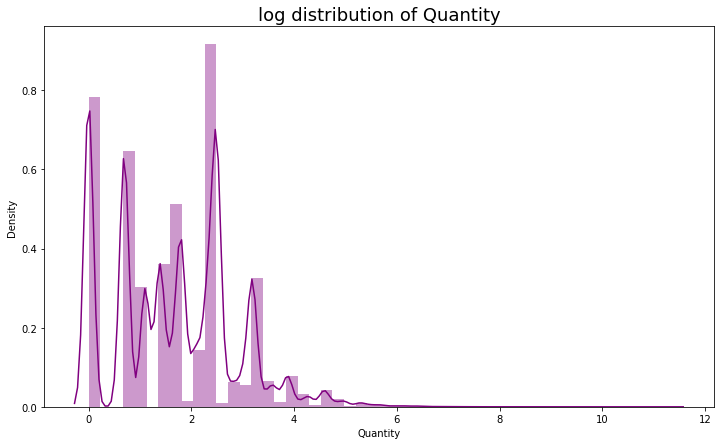

In [54]:
#Log transformation on distribution of Quantity 
plt.figure(figsize=(12,7))
plt.title('log distribution of Quantity', SIZE =18)
sns.distplot(np.log(df1['Quantity']),color="Purple")

Now it is better to understand the distibution of quantity & unit price column

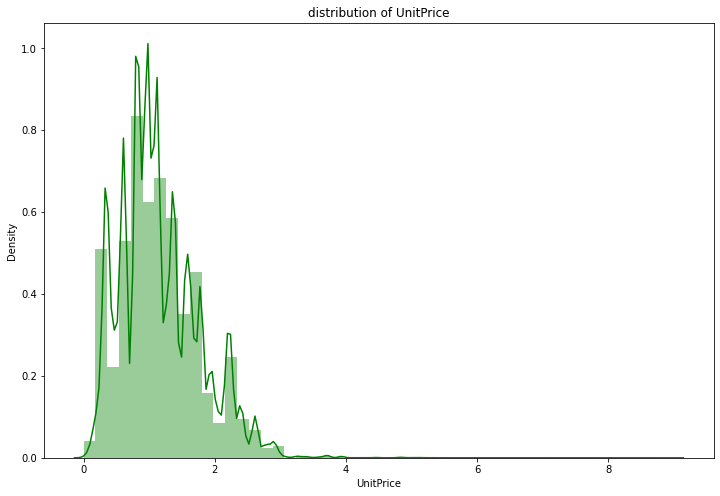

In [55]:
plt.figure(figsize=(12,8))
plt.title('distribution of UnitPrice')
sns.distplot(np.log1p(df1['UnitPrice']),color="G")

In [56]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 27.0+ MB


In [58]:
import datetime as dt
# Using the Invoice date column to extract 
df1['Day'] = df1['InvoiceDate'].dt.day
df1['Month'] = df1['InvoiceDate'].dt.month
df1['Year'] = df1['InvoiceDate'].dt.year